# Multiple Regression

Multiple regression is a form of regression analysis where more than one independent variable is used to predict the dependent variable. It extends simple linear regression by considering the combined effects of multiple features on the target variable.

The form of the multiple regression equation is:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

Where:
- $y$ is the dependent variable (what you are trying to predict).
- $x_1, x_2, \ldots, x_n$ are the independent variables (the input features).
- $\beta_0, \beta_1, \ldots, \beta_n$ are the coefficients of the regression (these are the parameters to be estimated).
- $\epsilon$ is the error term (the difference between the observed value and the predicted value).

## Goal of Multiple Regression

The goal is to find the values of $\beta_0, \beta_1, \ldots, \beta_n$ that minimize the sum of the squared errors (SSE) between the predicted and actual values, similar to simple linear regression:

$$
\text{SSE} = \sum (y_i - \hat{y_i})^2
$$

Where:
- $y_i$ is the actual value of the dependent variable.
- $\hat{y_i}$ is the predicted value from the multiple regression equation.

## Assumptions of Multiple Regression

The assumptions of multiple regression are similar to those in simple linear regression:

1. **Linearity**: The relationship between the independent variables and the dependent variable is linear.
2. **Independence**: The residuals (errors) are independent of each other.
3. **Homoscedasticity**: The variance of residuals is constant across all levels of the independent variables.
4. **Normality of residuals**: The residuals are normally distributed.
5. **No multicollinearity**: The independent variables should not be highly correlated with each other.

## Example

Let’s consider an example where we want to predict the price of a house based on several factors, such as the number of bedrooms, bathrooms, square footage, and so on.

- $y$ = Price of the house
- $x_1, x_2, \ldots, x_n$ = Number of bedrooms, bathrooms, square footage, etc.

A multiple regression model might estimate the relationship like:

$$
\text{Price} = 50,000 + 10,000 \times (\text{Bedrooms}) + 15,000 \times (\text{Bathrooms}) + 200 \times (\text{Sq. Ft.}) + \cdots
$$

In this example:
- The intercept $\beta_0$ is 50,000, meaning that the base price of the house starts at 50,000.
- The coefficient $\beta_1$ is 10,000, meaning that for each additional bedroom, the price increases by 10,000.
- The coefficient $\beta_2$ is 15,000, meaning that for each additional bathroom, the price increases by 15,000.
- The coefficient $\beta_3$ is 200, meaning that for each additional square foot, the price increases by 200.

## Model Fitting in Multiple Regression

The process of fitting a multiple regression model involves estimating the coefficients for each of the independent variables. This is done by minimizing the sum of squared errors (SSE) between the observed and predicted values of the dependent variable.

In practice, libraries such as `scikit-learn` in Python are used to implement multiple regression. Here is a step-by-step guide for fitting a multiple regression model:

### Step-by-Step Model Fitting:

1. **Select the features**: Identify the independent variables (features) that are relevant to predicting the target variable.
2. **Split the data**: Divide the dataset into training and testing sets.
3. **Fit the model**: Use the training data to fit a multiple regression model.
4. **Make predictions**: Use the model to predict values for the test data.
5. **Evaluate the model**: Assess the model's performance using metrics such as R-squared, mean squared error (MSE), or mean absolute error (MAE).



## Setup

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Multiple Regression with all selected features as independent variables:
Coefficients: [-3.23946171e+04 -1.22854092e+04  1.34755838e+02 -3.36636686e-01
 -3.19770392e+03  5.63700598e+05  6.15882474e+04  5.10222439e+04
  1.01139683e+05  5.22487385e+01  8.25070990e+01]
Intercept: -680282.3579459907
MAE: 154239.80586050337 MSE: 58191697589.352715 RMSE: 241229.55372290665 R^2 0.615074989258384
Conclusion: The model has a moderate relationship with price (R-squared = 0.62).
--------------------------------------------------


d:\anaconda\envs\venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


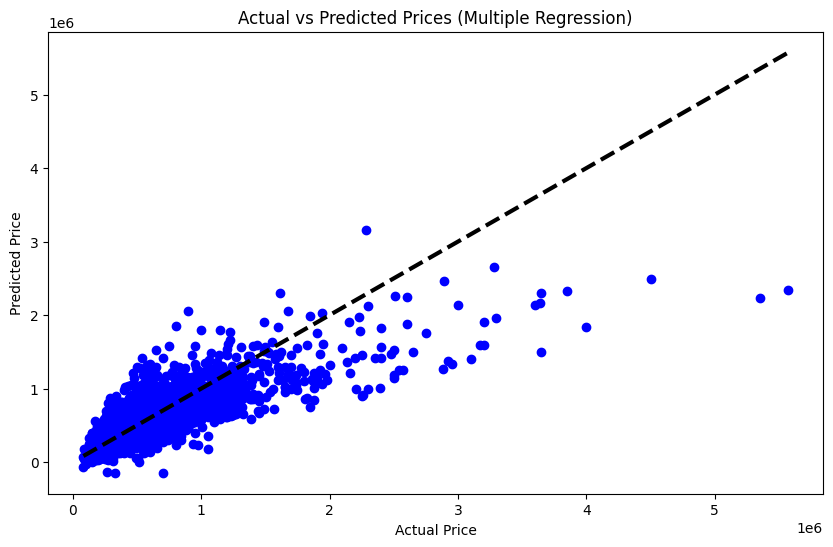

In [6]:
# List of independent variables (features) to try for multiple regression
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
            'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement']

# Target variable
y = df['price']

# Extract the selected features from the dataframe
X = df[features]  # Independent variables (multiple features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the multiple regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values using the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output the results
print("Multiple Regression with all selected features as independent variables:")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

# Interpretation of results
if r2 > 0.7:
    print(f"Conclusion: The model has a strong relationship with price (R-squared = {r2:.2f}).")
elif 0.3 <= r2 <= 0.7:
    print(f"Conclusion: The model has a moderate relationship with price (R-squared = {r2:.2f}).")
else:
    print(f"Conclusion: The model has a weak relationship with price (R-squared = {r2:.2f}).")

print("-" * 50)

# Plot the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)  # Identity line
plt.title('Actual vs Predicted Prices (Multiple Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
